<a href="https://colab.research.google.com/github/Chathura-Jayasinghe/EN3150_Assignment_03/blob/main/cnn_group_minions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import os
import tensorflow as tf

# Load and preprocess the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize and reshape the input data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)  # Add the channel dimension
test_images = test_images.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the CNN model
model = keras.Sequential([
    # First Convolutional Layer with 32 filters and a 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer with 64 filters and a 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),

    # MaxPooling layer to downsample the feature maps
    layers.MaxPooling2D((2, 2)),

    # Flatten the 2D feature maps to a 1D array
    layers.Flatten(),

    # Add a dense (fully connected) layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Add another dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Add the output layer with 10 units (one for each class) and softmax activation
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.00005

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
#optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.9)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:


# Combine training and testing data
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# First, split the data into 60% training and 40% for validation+testing
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    images, labels, test_size=0.4, random_state=42
)

# Now split the remaining 40% into 20% validation and 20% testing
val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42
)

# Train the model using the explicit validation set
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels),
    batch_size=1024,
    verbose=2
)

Epoch 1/20
33/33 - 5s - 140ms/step - accuracy: 0.9636 - loss: 0.1256 - val_accuracy: 0.9650 - val_loss: 0.1207
Epoch 2/20
33/33 - 1s - 30ms/step - accuracy: 0.9651 - loss: 0.1202 - val_accuracy: 0.9656 - val_loss: 0.1182
Epoch 3/20
33/33 - 1s - 19ms/step - accuracy: 0.9662 - loss: 0.1174 - val_accuracy: 0.9666 - val_loss: 0.1154
Epoch 4/20
33/33 - 1s - 18ms/step - accuracy: 0.9667 - loss: 0.1148 - val_accuracy: 0.9666 - val_loss: 0.1140
Epoch 5/20
33/33 - 1s - 23ms/step - accuracy: 0.9679 - loss: 0.1121 - val_accuracy: 0.9674 - val_loss: 0.1117
Epoch 6/20
33/33 - 1s - 36ms/step - accuracy: 0.9684 - loss: 0.1099 - val_accuracy: 0.9682 - val_loss: 0.1100
Epoch 7/20
33/33 - 1s - 18ms/step - accuracy: 0.9690 - loss: 0.1075 - val_accuracy: 0.9681 - val_loss: 0.1100
Epoch 8/20
33/33 - 1s - 17ms/step - accuracy: 0.9698 - loss: 0.1056 - val_accuracy: 0.9692 - val_loss: 0.1074
Epoch 9/20
33/33 - 1s - 19ms/step - accuracy: 0.9702 - loss: 0.1036 - val_accuracy: 0.9689 - val_loss: 0.1059
Epoch 10/

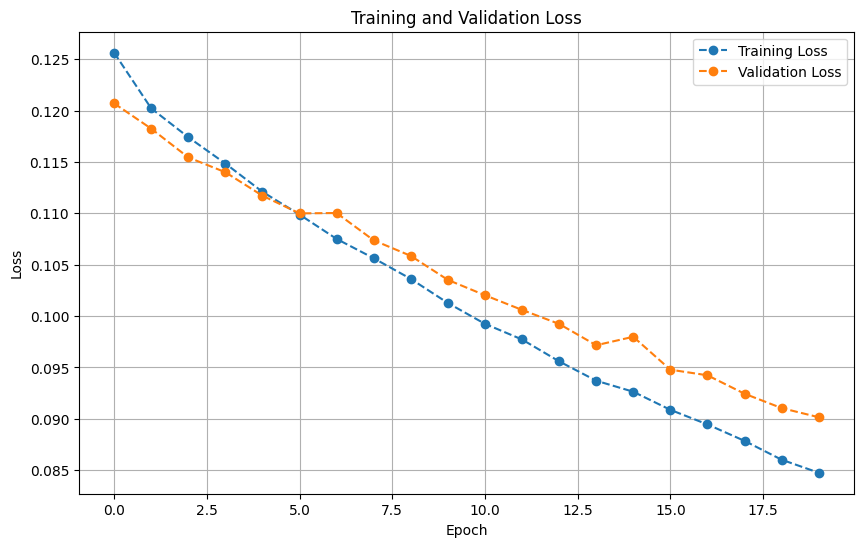

In [8]:
import matplotlib.pyplot as plt
# Plot training, validation, and testing loss with respect to epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Evaluate the model on the test data and collect test loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0992
Test Loss: 0.09319760650396347
Test Accuracy: 0.9714285731315613
